In [26]:
import pandas as pd

# Load the dataset (assuming it's a CSV file)
df = pd.read_csv('Baltimore911.csv', low_memory=False)

num_rows, num_columns = df.shape

print(f"Total number of call instances/rows: {num_rows}")
print(f"Total number of call features/columns: {num_columns}")

# Check if 'Location 1' column contains all null values (NaN)
if df['Location 1'].isna().all():
    df = df.drop('Location 1', axis=1)
num_rows, num_columns = df.shape
# Continue with the rest of your data processing or analysis

print(f"Total number of call instances/rows: {num_rows}")
print(f"Total number of call features/columns: {num_columns}")


Total number of call instances/rows: 292761
Total number of call features/columns: 16
Total number of call instances/rows: 292761
Total number of call features/columns: 15


In [27]:
df.drop_duplicates(inplace=True)
num_rows, num_columns = df.shape

print(f"Total number of call instances/rows: {num_rows}")
print(f"Total number of call features/columns: {num_columns}")

Total number of call instances/rows: 281319
Total number of call features/columns: 15


In [28]:
df.info


<bound method DataFrame.info of          CrimeDate CrimeTime CrimeCode               Location  \
0       02/08/2020   2:18:00        5D     1700 CLIFTVIEW AVE   
1       02/08/2020   6:00:00        6G      700 N STREEPER ST   
2       02/08/2020   9:50:00       3JF        1400 N BROADWAY   
4       02/08/2020  17:30:00        5A       1600 E OLIVER ST   
5       02/08/2020  19:00:00        5A       1400 AISQUITH ST   
...            ...       ...       ...                    ...   
292756  01/01/1978  10:30:00        2A        1900 ARGONNE DR   
292757  05/01/1977   0:01:00        2A          600 W 34TH ST   
292758  06/01/1975   0:00:00        2A  4400 OLD FREDERICK RD   
292759  07/20/1969  21:00:00        2A        5400 ROLAND AVE   
292760  10/30/1963   0:00:00        2A      3100 FERNDALE AVE   

                Description Inside/Outside   Weapon Post   District  \
0                  BURGLARY              I      NaN  312    EASTERN   
1                   LARCENY              I   

In [29]:
import pandas as pd

# Initialize empty lists to store profile information
column_names = []
data_types = []
mins = []
maxs = []
means = []
medians = []
std_devs = []
unique_values_counts = []
top_1_values = []
top_2_values = []
top_3_values = []
missing_percentages = []
attribute_types = []  # New column to store attribute types

# Iterate through columns in your DataFrame
for column_name in df.columns:
    column = df[column_name]
    
    # Get data type
    data_type = str(column.dtypes)
    
    # Initialize variables to store column statistics
    min_val, max_val, mean_val, median_val, std_dev = None, None, None, None, None
    unique_vals = None
    missing_percent = column.isnull().mean() * 100
    
    # Check if the column is numeric
    if column.dtypes in ['int64', 'float64']:
        min_val = column.min()
        max_val = column.max()
        mean_val = column.mean()
        median_val = column.median()
        std_dev = column.std()
        attribute_type = 'Numeric/Continuous'
    else:
        # If it's not numeric, it's discrete
        unique_vals = len(column.unique())
        top_values = column.value_counts().head(3).reset_index()
        top_values.columns = ['Value', 'Count']
        top_1, top_2, top_3 = None, None, None
        if len(top_values) >= 1:
            top_1 = top_values.iloc[0]['Value']
        if len(top_values) >= 2:
            top_2 = top_values.iloc[1]['Value']
        if len(top_values) >= 3:
            top_3 = top_values.iloc[2]['Value']
        attribute_type = 'Symbolic/Discrete'
    
    # Append the information to respective lists
    column_names.append(column_name)
    data_types.append(data_type)
    mins.append(min_val)
    maxs.append(max_val)
    means.append(mean_val)
    medians.append(median_val)
    std_devs.append(std_dev)
    unique_values_counts.append(unique_vals)
    top_1_values.append(top_1)
    top_2_values.append(top_2)
    top_3_values.append(top_3)
    missing_percentages.append(missing_percent)
    attribute_types.append(attribute_type)

# Create the profile DataFrame
profile_df = pd.DataFrame({
    'Column Name': column_names,
    'Data Type': data_types,
    'Min': mins,
    'Max': maxs,
    'Mean': means,
    'Median': medians,
    'Std Dev': std_devs,
    'Unique Values': unique_values_counts,
    'Top 1 Value': top_1_values,
    'Top 2 Value': top_2_values,
    'Top 3 Value': top_3_values,
    'Missing %': missing_percentages,
    'Attribute Type': attribute_types  # New column
})

# Print the profile DataFrame
print(profile_df)


        Column Name Data Type        Min        Max       Mean     Median  \
0         CrimeDate    object        NaN        NaN        NaN        NaN   
1         CrimeTime    object        NaN        NaN        NaN        NaN   
2         CrimeCode    object        NaN        NaN        NaN        NaN   
3          Location    object        NaN        NaN        NaN        NaN   
4       Description    object        NaN        NaN        NaN        NaN   
5    Inside/Outside    object        NaN        NaN        NaN        NaN   
6            Weapon    object        NaN        NaN        NaN        NaN   
7              Post    object        NaN        NaN        NaN        NaN   
8          District    object        NaN        NaN        NaN        NaN   
9      Neighborhood    object        NaN        NaN        NaN        NaN   
10        Longitude   float64 -81.529189 -76.383228 -76.617417 -76.613935   
11         Latitude   float64  37.577262  39.661332  39.306865  39.302882   

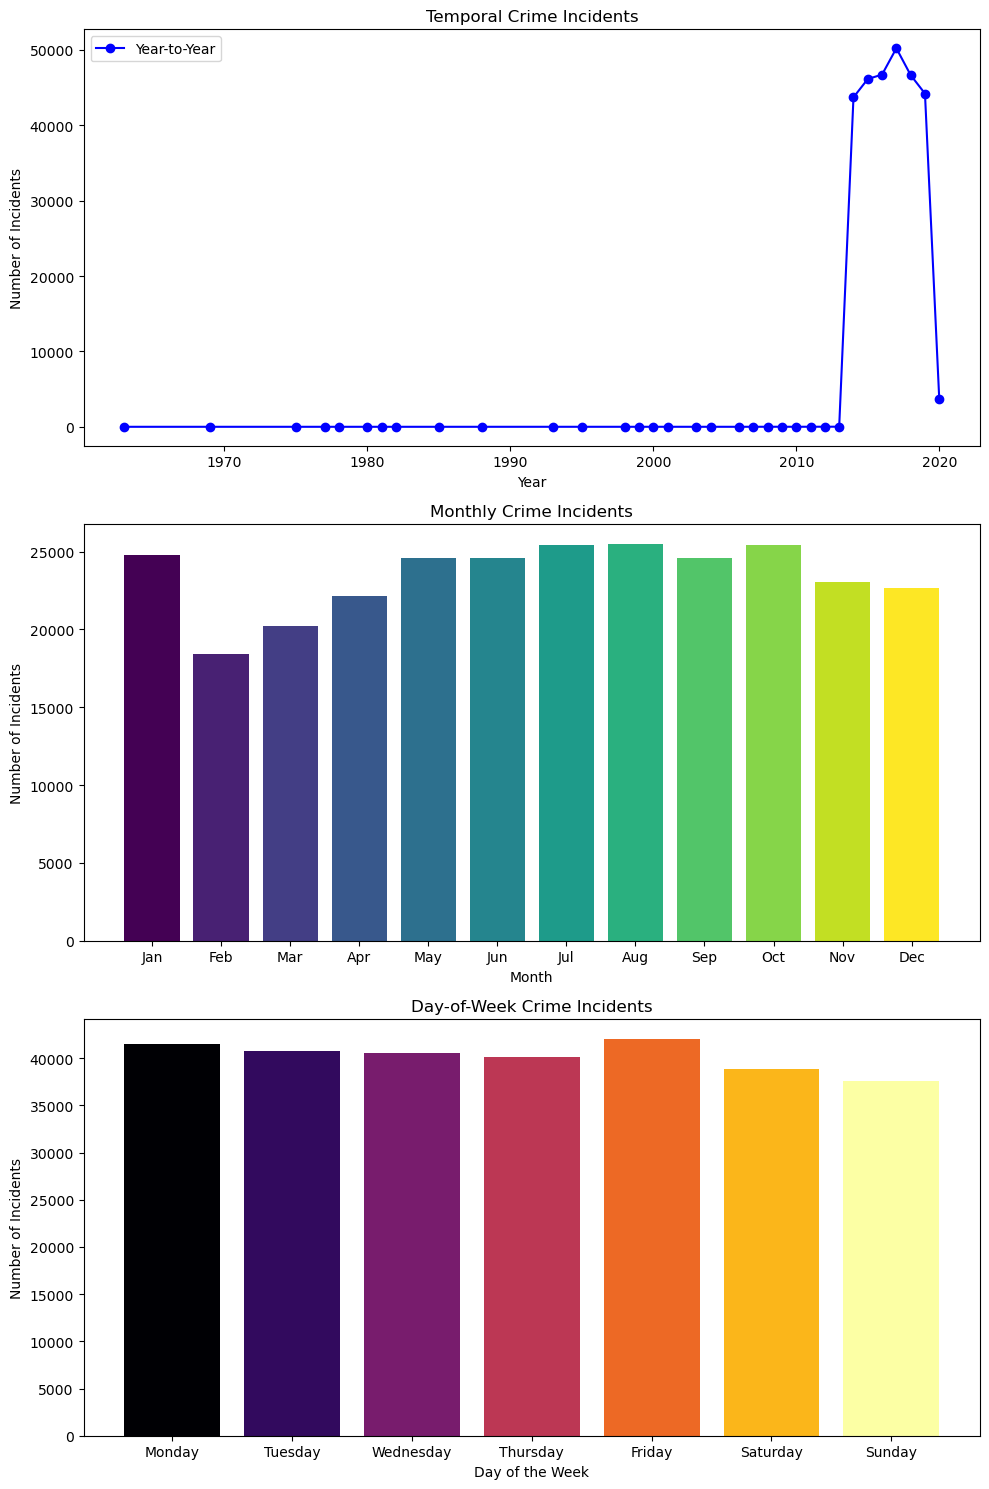

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar  # For month name mapping

# Assuming your DataFrame is named 'df' and has a 'Date' column with timestamps
# Make sure the 'Date' column is in datetime format, if not, convert it
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract year, month, and day of the week from the 'Date' column
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Group by year and count the number of incidents
yearly_incidents = df.groupby('Year').size()

# Group by month and count the number of incidents
monthly_incidents = df.groupby('Month').size()

# Group by day of the week and count the number of incidents
day_of_week_incidents = df.groupby('DayOfWeek').size()

# Create color lists for the bar graphs
monthly_colors = plt.cm.viridis(np.linspace(0, 1, len(monthly_incidents)))
day_of_week_colors = plt.cm.inferno(np.linspace(0, 1, len(day_of_week_incidents)))

# Create subplots for each temporal pattern
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Year-to-Year pattern as a line plot with a unique color
axes[0].plot(yearly_incidents.index, yearly_incidents.values, marker='o', color='blue', label='Year-to-Year')
axes[0].set_title('Temporal Crime Incidents')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Incidents')
axes[0].legend()

# Monthly pattern as a bar graph with different colors
months = [calendar.month_abbr[i] for i in monthly_incidents.index]  # Get month abbreviations
axes[1].bar(monthly_incidents.index, monthly_incidents.values, color=monthly_colors)
axes[1].set_title('Monthly Crime Incidents')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Incidents')
axes[1].set_xticks(monthly_incidents.index)  # Set x-axis tick positions
axes[1].set_xticklabels(months)  # Set x-axis tick labels to month abbreviations

# Day-of-week pattern as a bar graph with different colors
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axes[2].bar(day_names, day_of_week_incidents.values, color=day_of_week_colors)
axes[2].set_title('Day-of-Week Crime Incidents')
axes[2].set_xlabel('Day of the Week')
axes[2].set_ylabel('Number of Incidents')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


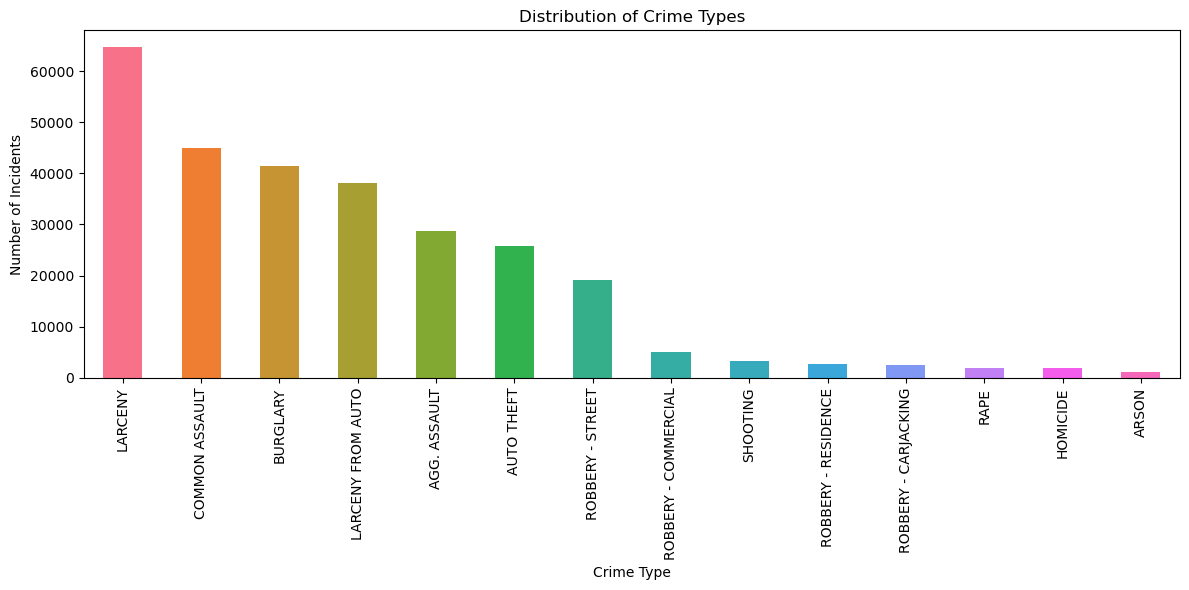

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For color palettes (optional)

# Group by 'CrimeType' and count the number of incidents for each type
crime_type_counts = df['Description'].value_counts()

# Create a bar plot for the distribution of crime types with different colors
plt.figure(figsize=(12, 6))

# You can choose a color palette from seaborn or matplotlib for different colors
# For example, using a seaborn color palette:
color_palette = sns.color_palette('husl', n_colors=len(crime_type_counts))

# Create the bar plot
ax = crime_type_counts.plot(kind='bar', color=color_palette)

# Customize the plot
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()



In [8]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


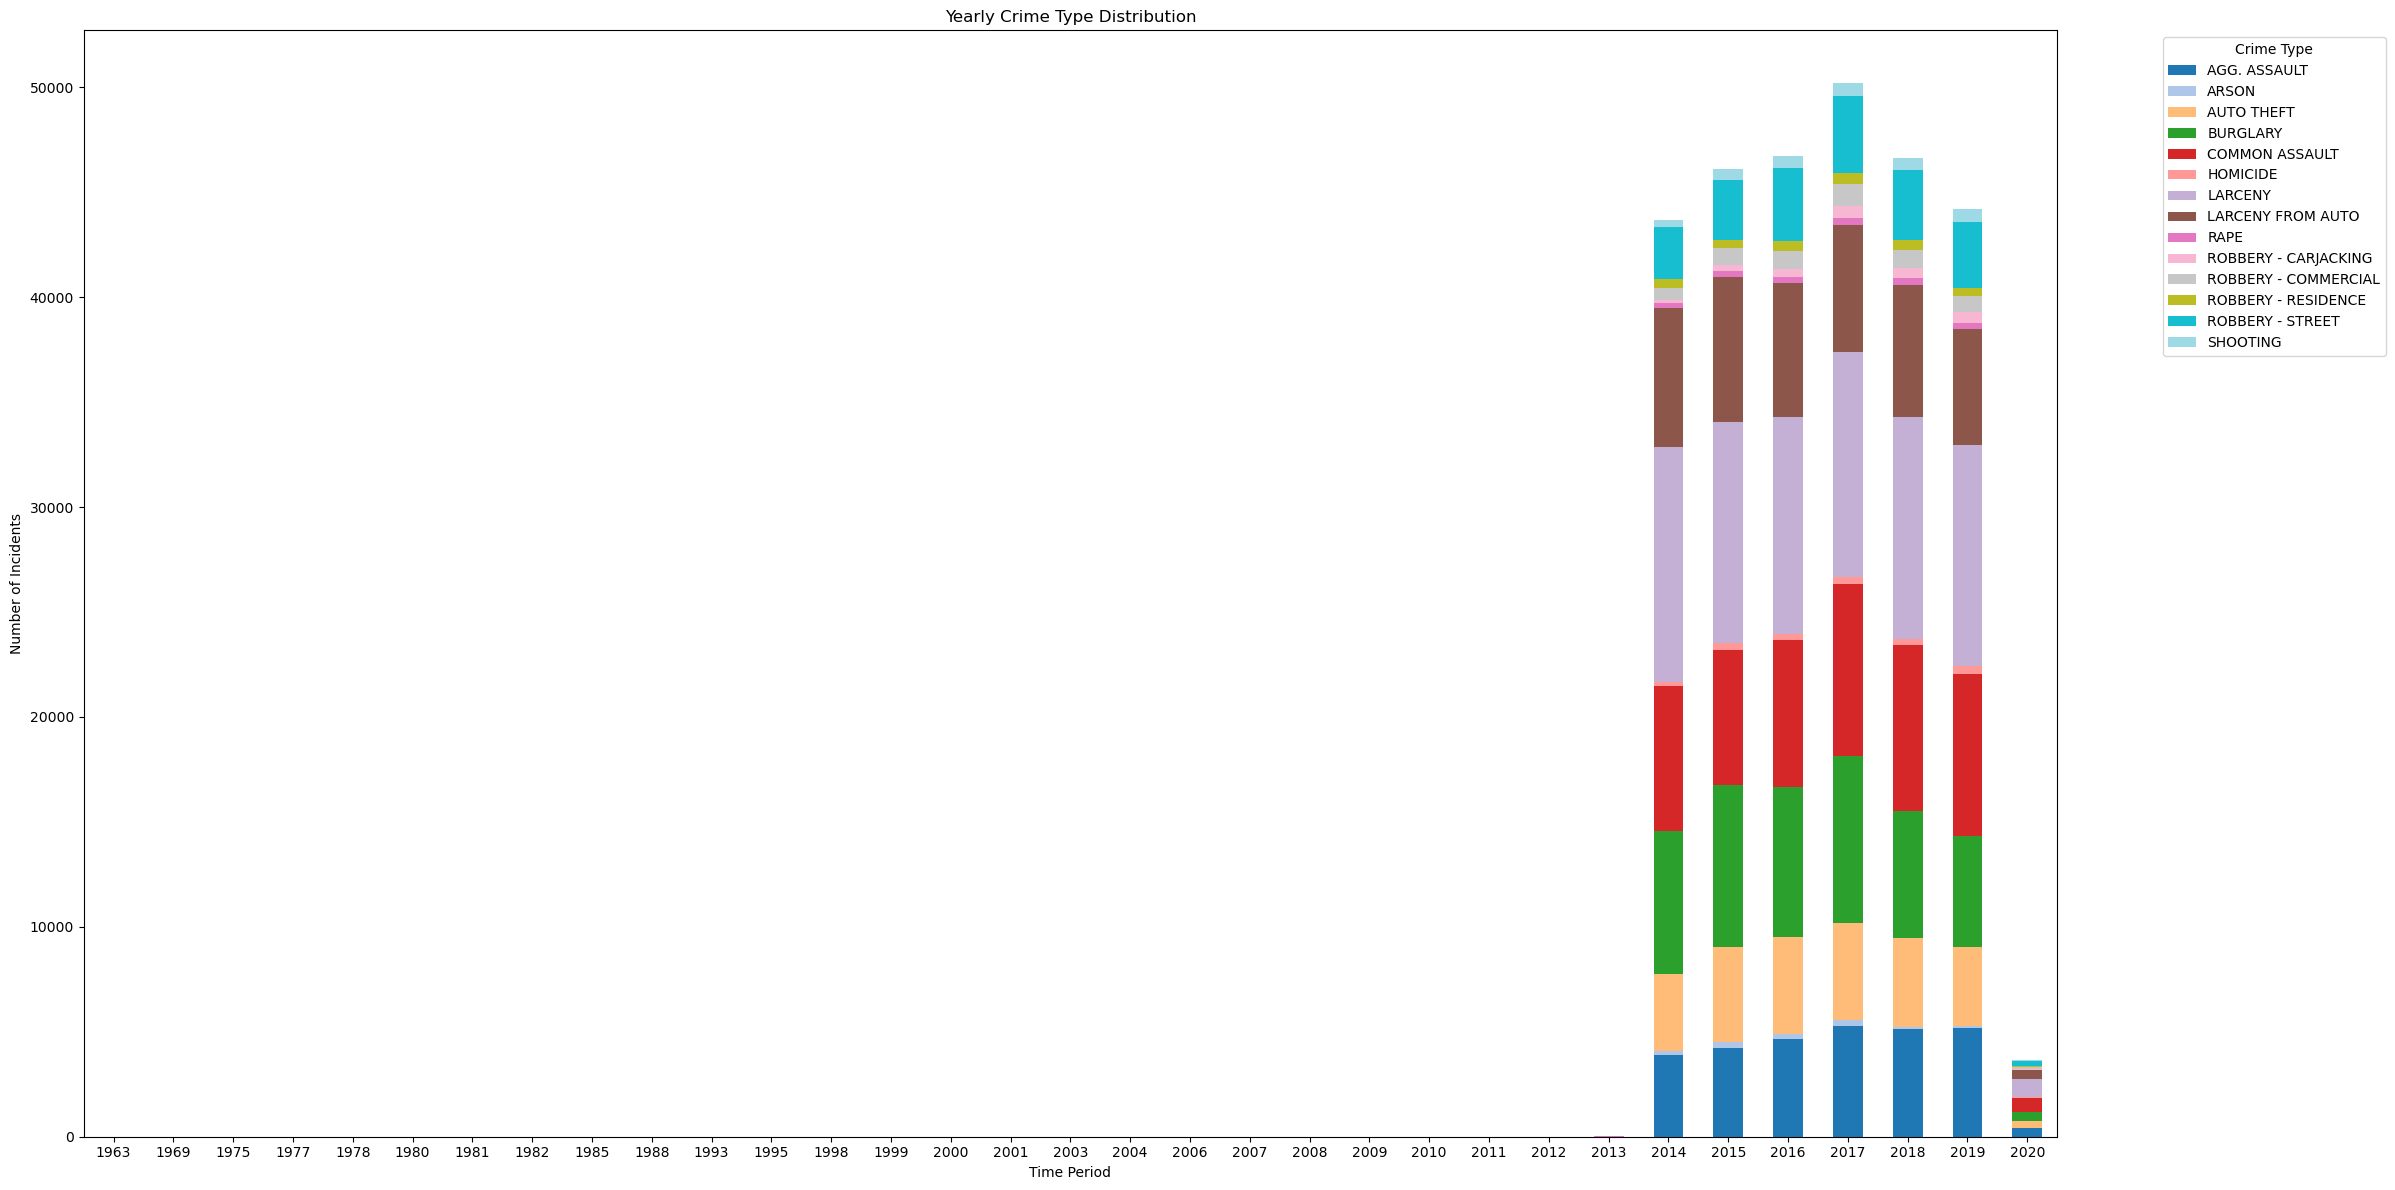

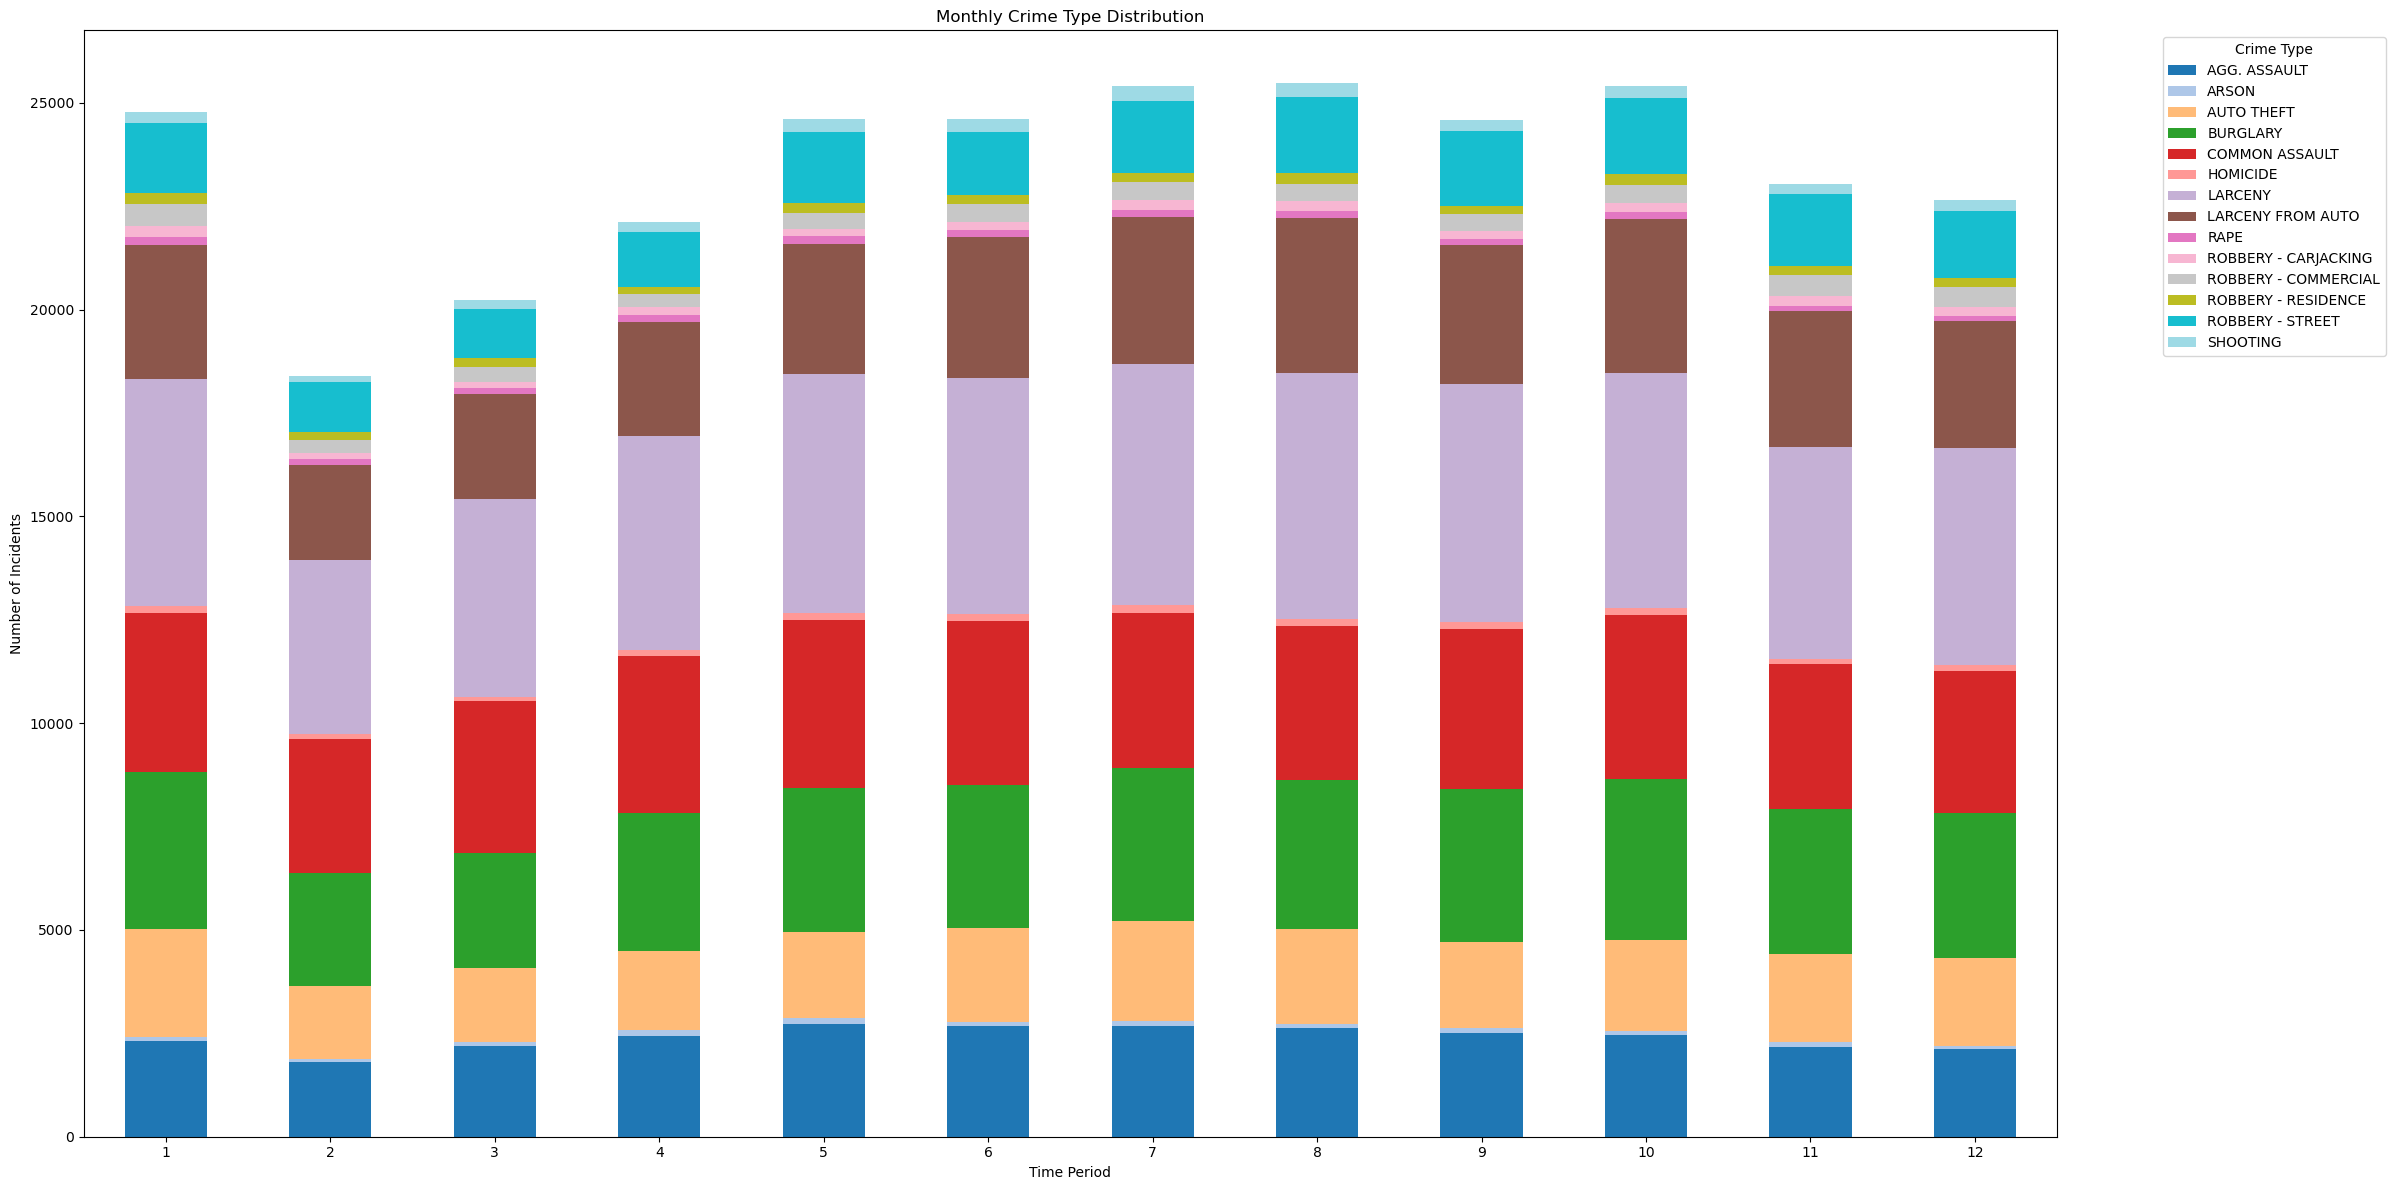

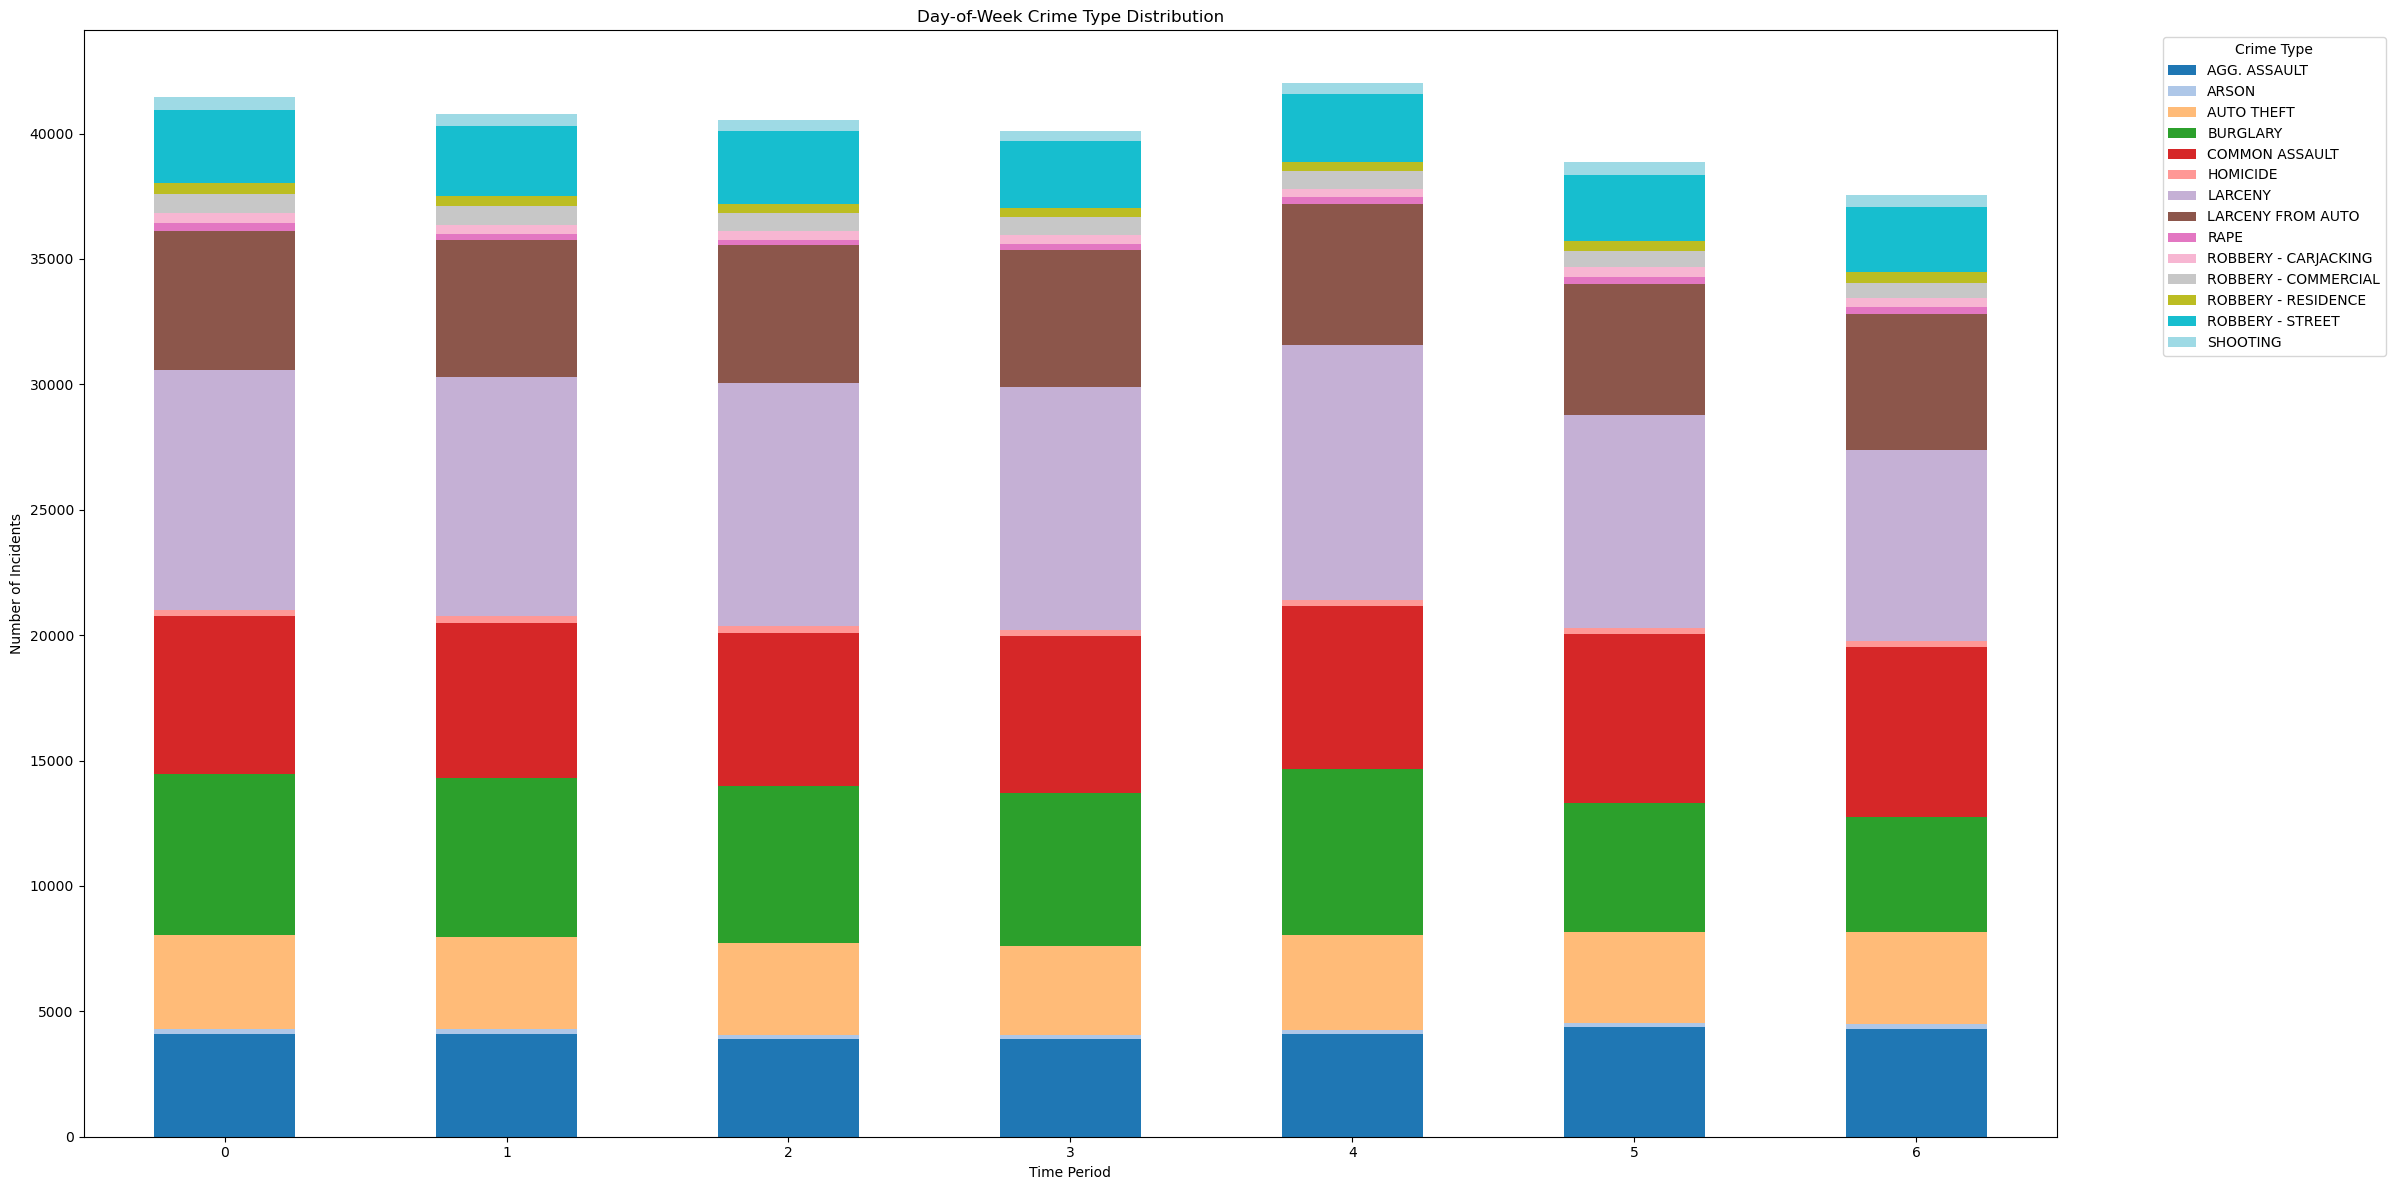

In [32]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert the 'Date' column to datetime format if it's not already
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract year, month, and day of the week from the 'Date' column
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Group by 'Year' and 'CrimeType' and count the number of incidents for each type in each year
yearly_crime_type_counts = df.groupby(['Year', 'Description']).size().unstack(fill_value=0)

# Group by 'Month' and 'CrimeType' and count the number of incidents for each type in each month
monthly_crime_type_counts = df.groupby(['Month', 'Description']).size().unstack(fill_value=0)

# Group by 'DayOfWeek' and 'CrimeType' and count the number of incidents for each type on each day of the week
day_of_week_crime_type_counts = df.groupby(['DayOfWeek', 'Description']).size().unstack(fill_value=0)

# Create a function to plot crime type distributions
def plot_crime_type_distribution(data, title):
    plt.figure(figsize=(24, 12))
    ax = data.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
    plt.title(title)
    plt.xlabel('Time Period')
    plt.ylabel('Number of Incidents')
    plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Create plots for each time-based aggregation
plot_crime_type_distribution(yearly_crime_type_counts, 'Yearly Crime Type Distribution')
plot_crime_type_distribution(monthly_crime_type_counts, 'Monthly Crime Type Distribution')
plot_crime_type_distribution(day_of_week_crime_type_counts, 'Day-of-Week Crime Type Distribution')

In [33]:
pip install dash


Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install pandas matplotlib plotly dash


Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Load your crime data into a DataFrame (assuming 'df' contains the data)
# Make sure you have the necessary data columns such as 'Location', 'CrimeDate', 'Description', etc.
# Replace missing locations with 'Unknown'
df['Location'].fillna('Unknown', inplace=True)

# Calculate the center point for the map based on your filtered data
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()

# Set the zoom level for the map
city_zoom_level = 7000

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Crime Patterns Explorer"),
    
    # Dropdown to select location (based on unique values in 'Location' column)
    dcc.Dropdown(
        id='location-dropdown',
        options=[{'label': location, 'value': location} for location in df['Location'].unique()],
        value=df['Location'].unique()[0],  # Default location
        multi=False
    ),
    
    # Dropdown to select time period (e.g., year, month, day-of-week)
    dcc.Dropdown(
        id='time-period-dropdown',
        options=[
            {'label': 'Yearly', 'value': 'year'},
            {'label': 'Monthly', 'value': 'month'},
            {'label': 'Day-of-Week', 'value': 'day_of_week'},
        ],
        value='year',  # Default time period
        multi=False
    ),
    
    # Graph for spatial distribution of crime
    dcc.Graph(id='spatial-map'),
    
    # Graph for temporal distribution of crime
    dcc.Graph(id='temporal-plot')
])

# Define callback functions to update graphs based on user inputs
@app.callback(
    Output('spatial-map', 'figure'),
    Output('temporal-plot', 'figure'),
    Input('location-dropdown', 'value'),
    Input('time-period-dropdown', 'value')
)
def update_graphs(selected_location, selected_time_period):
    # Filter data based on selected location
    filtered_data = df[df['Location'] == selected_location].copy()  # Create a copy of the filtered data
    
    # Create spatial distribution map using Plotly Express
    spatial_map = px.scatter_geo(
        filtered_data,
        lat='Latitude',
        lon='Longitude',
        color='Description',
        title=f'Spatial Distribution of Crime in {selected_location}',
    )

    # Set the center and zoom level for the map based on the calculated values
    spatial_map.update_geos(center=dict(lat=center_lat, lon=center_lon), projection_scale=city_zoom_level)
    
    # Create temporal distribution plot using Plotly
    temporal_plot = None
    if selected_time_period == 'year':
        # Extract year from 'CrimeDate' and count incidents
        filtered_data['Year'] = filtered_data['CrimeDate'].dt.year
        grouped_data = filtered_data.groupby('Year')['Description'].count().reset_index()
        temporal_plot = px.bar(
            grouped_data,
            x='Year',
            y='Description',
            labels={'Year': 'Year', 'Description': 'Number of Incidents'},
            title=f'Temporal Distribution of Crime in {selected_location} (Yearly)',
            color=grouped_data.index,  # Assign different colors based on index
            color_continuous_scale=px.colors.sequential.Viridis
        )
        # Set x-axis labels to be integers
        temporal_plot.update_xaxes(type='category')
    elif selected_time_period == 'month':
        # Extract month from 'CrimeDate' and count incidents
        filtered_data['Month'] = filtered_data['CrimeDate'].dt.month
        grouped_data = filtered_data.groupby('Month')['Description'].count().reset_index()
        
        # Define the order of months and corresponding labels
        month_labels = [
            'January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December'
        ]
        
        temporal_plot = px.bar(
            grouped_data,
            x='Month',
            y='Description',
            labels={'Month': 'Month', 'Description': 'Number of Incidents'},
            title=f'Temporal Distribution of Crime in {selected_location} (Monthly)',
            color=grouped_data.index,  # Assign different colors based on index
            color_continuous_scale=px.colors.sequential.Viridis
        )
        # Set x-axis labels to be the names of the months and specify the category order and text
        temporal_plot.update_xaxes(type='category', categoryorder='array', categoryarray=month_labels, ticktext=month_labels)
    elif selected_time_period == 'day_of_week':
        # Extract day of the week from 'CrimeDate' and count incidents
        filtered_data['DayOfWeek'] = filtered_data['CrimeDate'].dt.dayofweek
        filtered_data['DayOfWeek'] = filtered_data['DayOfWeek'].map({
            0: 'Monday',
            1: 'Tuesday',
            2: 'Wednesday',
            3: 'Thursday',
            4: 'Friday',
            5: 'Saturday',
            6: 'Sunday'
        })
        grouped_data = filtered_data.groupby('DayOfWeek')['Description'].count().reset_index()
        temporal_plot = px.bar(
            grouped_data,
            x='DayOfWeek',
            y='Description',
            labels={'DayOfWeek': 'Day of the Week', 'Description': 'Number of Incidents'},
            title=f'Temporal Distribution of Crime in {selected_location} (Day of the Week)',
            color=grouped_data.index,  # Assign different colors based on index
            color_continuous_scale=px.colors.sequential.Viridis
        )
        # Set x-axis labels to be the names of the days of the week
        temporal_plot.update_xaxes(type='category', categoryorder='array', categoryarray=[
            'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
        ])
    
    return spatial_map, temporal_plot

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
